## Hay que hacer un Modelo que utilice los datos de solo los lunes y se le entrena con el patron de los lunes a las 8 am, 9 am... donde hay más movimiento

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-01':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data6.tail(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-31 19:00:00,509.100,2020-08-31,2020,8,0,19,36
2020-08-31 20:00:00,293.615,2020-08-31,2020,8,0,20,36
2020-08-31 21:00:00,256.641,2020-08-31,2020,8,0,21,36
2020-08-31 22:00:00,172.866,2020-08-31,2020,8,0,22,36
2020-08-31 23:00:00,140.111,2020-08-31,2020,8,0,23,36


In [5]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4,5,6]    
dict_dias={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
        
for periodo in lista_periodos:        
    cont=0
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=['ds',listaDst[1],'Hora','Fecha','WeekNo','ID_Dia'])
    globals()[f"df_{periodo}"].set_index([listaDst[1]], inplace = True) 
    
    for dia in dict_dias:        
        globals()[f"df_{dict_dias[dia]}_{periodo}"] = globals()[f"df_{periodo}"].loc[globals()[f"df_{periodo}"].loc[:,'ID_Dia'] == cont]  # Seleccionamos solo los datos del lunes o solo los datos del martes para crear nuevas tablas dependiendo del día        
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = pd.DataFrame({})  #Creamos un nuevo dataframe vacio
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
        
        #Seleccionamos celdas del dataframe para generar las fechas que se requieren graficar
        start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['Fecha'] #Primera celda de la columna fecha
        period_start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['WeekNo']
        period_end = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].at[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].index[-1],'WeekNo']  #última celda de columna WeekNo
        
        #Condición de error en period_start/period_end
        if (type(period_start) == pd.core.series.Series) | (type(period_end) == pd.core.series.Series):    
            lista = list(period_end)
            period_end = lista[-1]        
        
        periods = list(range(period_start, period_end+1))

        #Obtenemos las fechas de cada día 
        date_generated = pd.date_range(start, periods=len(periods), freq='7D')
        
        #Creamos una tabla para cada fecha de cada lunes o de cada martes..
        cont2=1        
        for date in date_generated:            
            globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}_{cont2}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[:,'Fecha'] == date]
            cont2=cont2+1
        cont=cont+1
    

/tmp/ipykernel_4686/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_4686/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_4686/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard li

/tmp/ipykernel_4686/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_4686/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

In [6]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
period3 = filtrado_Data_Monday_5
period4 = filtrado_Data_Monday_6
Lunes = pd.concat([period1,period2,period3,period4])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-08-31')
mask = (Lunes['Fecha'] >= start_date) & (Lunes['Fecha'] <= end_date)
Lunes = Lunes.loc[mask]
Lunes = Lunes.reset_index()
Lunes = Lunes.set_index(["ds"])
#desescalada.tail(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


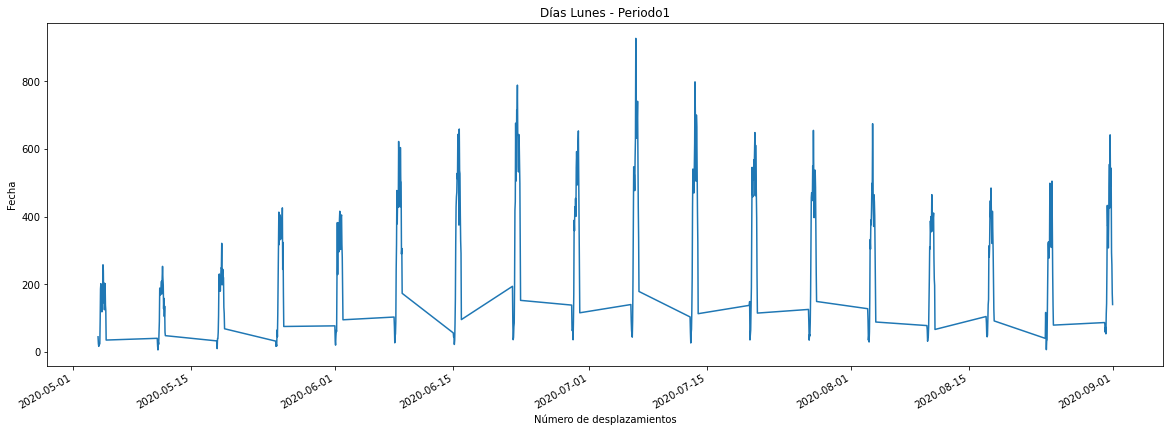

In [7]:
Lunes[Lunes.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Periodo1')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Patrón Día Lunes 8 Am

In [8]:
filtrar_Hora = Lunes.loc[Lunes.loc[:,'Hora'] == 8]
filtrar_Hora.head()

,2807905-2807901,Hora,Fecha,WeekNo,ID_Dia
ds,,,,,
2020-05-04 08:00:00,201.729,8,2020-05-04,19,0
2020-05-11 08:00:00,180.508,8,2020-05-11,20,0
2020-05-18 08:00:00,230.382,8,2020-05-18,21,0
2020-05-25 08:00:00,304.809,8,2020-05-25,22,0
2020-06-01 08:00:00,228.754,8,2020-06-01,23,0


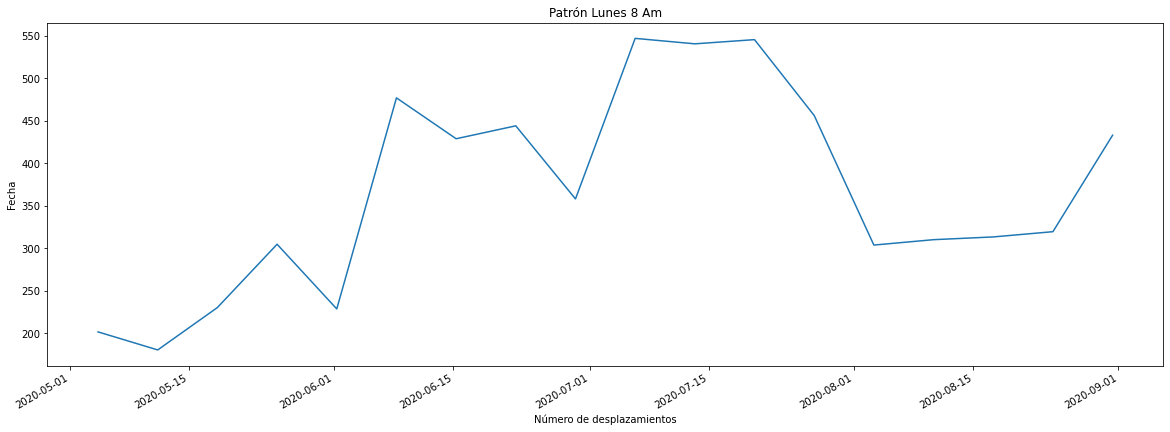

In [9]:
filtrar_Hora[filtrar_Hora.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 8 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Periodo 1 - Lunes: Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [10]:
Lunes = Lunes.drop(columns=['Fecha','ID_Dia','Hora','WeekNo'])
Lunes = Lunes.reset_index()
Lunes = Lunes.rename(columns={'2807905-2807901':'y'})
Lunes.tail()

,ds,y
427,2020-08-31 19:00:00,509.100
428,2020-08-31 20:00:00,293.615
429,2020-08-31 21:00:00,256.641
430,2020-08-31 22:00:00,172.866
431,2020-08-31 23:00:00,140.111


# Calculo de predicción Prophet 
## Definimos datos de entrenamiento y datos de prueba

In [11]:
# X = Lunes.y
# Y = Lunes.ds
# size = int(len(X) * 0.9)
# train_X, test_X = X[0:size], X[size:len(X)]
# train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
# Train = pd.concat([train_Y,train_X], axis=1)
# Test = pd.concat([test_Y,test_X], axis=1)

Train = Lunes


## Encontramos el número de Días que se van a analizar 

In [12]:
start = Train.iloc[0]['ds']
end = Train.iloc[-1]['ds'] 
N_Dias = pd.date_range(start, end, freq='D')
print(len(N_Dias))

120


In [20]:
Test.head()


,ds,y,Lunes1AM,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
0,2020-05-04 00:00:00,44.768,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2020-05-04 01:00:00,24.145,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-05-04 02:00:00,16.513,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-05-04 03:00:00,24.017,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-05-04 04:00:00,22.930,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Establecemos una estacionalidad condicional

In [14]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 0)

Train['Lunes1AM'] = Train['ds'].apply(est_Lunes1AM)
Test['Lunes1AM'] = Test['ds'].apply(est_Lunes1AM)

Train['Lunes2AM'] = Train['ds'].apply(est_Lunes2AM)
Test['Lunes2AM'] = Test['ds'].apply(est_Lunes2AM)

Train['Lunes3AM'] = Train['ds'].apply(est_Lunes3AM)
Test['Lunes3AM'] = Test['ds'].apply(est_Lunes3AM)

Train['Lunes4AM'] = Train['ds'].apply(est_Lunes4AM)
Test['Lunes4AM'] = Test['ds'].apply(est_Lunes4AM)

Train['Lunes5AM'] = Train['ds'].apply(est_Lunes5AM)
Test['Lunes5AM'] = Test['ds'].apply(est_Lunes5AM)

Train['Lunes6AM'] = Train['ds'].apply(est_Lunes6AM)
Test['Lunes6AM'] = Test['ds'].apply(est_Lunes6AM)

Train['Lunes7AM'] = Train['ds'].apply(est_Lunes7AM)
Test['Lunes7AM'] = Test['ds'].apply(est_Lunes7AM)

Train['Lunes8AM'] = Train['ds'].apply(est_Lunes8AM)
Test['Lunes8AM'] = Test['ds'].apply(est_Lunes8AM)

Train['Lunes9AM'] = Train['ds'].apply(est_Lunes9AM)
Test['Lunes9AM'] = Test['ds'].apply(est_Lunes9AM)

Train['Lunes10AM'] = Train['ds'].apply(est_Lunes10AM)
Test['Lunes10AM'] = Test['ds'].apply(est_Lunes10AM)

Train['Lunes11AM'] = Train['ds'].apply(est_Lunes11AM)
Test['Lunes11AM'] = Test['ds'].apply(est_Lunes11AM)

Train['Lunes12PM'] = Train['ds'].apply(est_Lunes12PM)
Test['Lunes12PM'] = Test['ds'].apply(est_Lunes12PM)

Train['Lunes13PM'] = Train['ds'].apply(est_Lunes13PM)
Test['Lunes13PM'] = Test['ds'].apply(est_Lunes13PM)

Train['Lunes14PM'] = Train['ds'].apply(est_Lunes14PM)
Test['Lunes14PM'] = Test['ds'].apply(est_Lunes14PM)

Train['Lunes15PM'] = Train['ds'].apply(est_Lunes15PM)
Test['Lunes15PM'] = Test['ds'].apply(est_Lunes15PM)

Train['Lunes16PM'] = Train['ds'].apply(est_Lunes16PM)
Test['Lunes16PM'] = Test['ds'].apply(est_Lunes16PM)

Train['Lunes17PM'] = Train['ds'].apply(est_Lunes17PM)
Test['Lunes17PM'] = Test['ds'].apply(est_Lunes17PM)

Train['Lunes18PM'] = Train['ds'].apply(est_Lunes18PM)
Test['Lunes18PM'] = Test['ds'].apply(est_Lunes18PM)

Train['Lunes19PM'] = Train['ds'].apply(est_Lunes19PM)
Test['Lunes19PM'] = Test['ds'].apply(est_Lunes19PM)

Train['Lunes20PM'] = Train['ds'].apply(est_Lunes20PM)
Test['Lunes20PM'] = Test['ds'].apply(est_Lunes20PM)

Train['Lunes21PM'] = Train['ds'].apply(est_Lunes21PM)
Test['Lunes21PM'] = Test['ds'].apply(est_Lunes21PM)

Train['Lunes22PM'] = Train['ds'].apply(est_Lunes22PM)
Test['Lunes22PM'] = Test['ds'].apply(est_Lunes22PM)

Train['Lunes23PM'] = Train['ds'].apply(est_Lunes23PM)
Test['Lunes23PM'] = Test['ds'].apply(est_Lunes23PM)

Train['Lunes24AM'] = Train['ds'].apply(est_Lunes24AM)
Test['Lunes24AM'] = Test['ds'].apply(est_Lunes24AM)



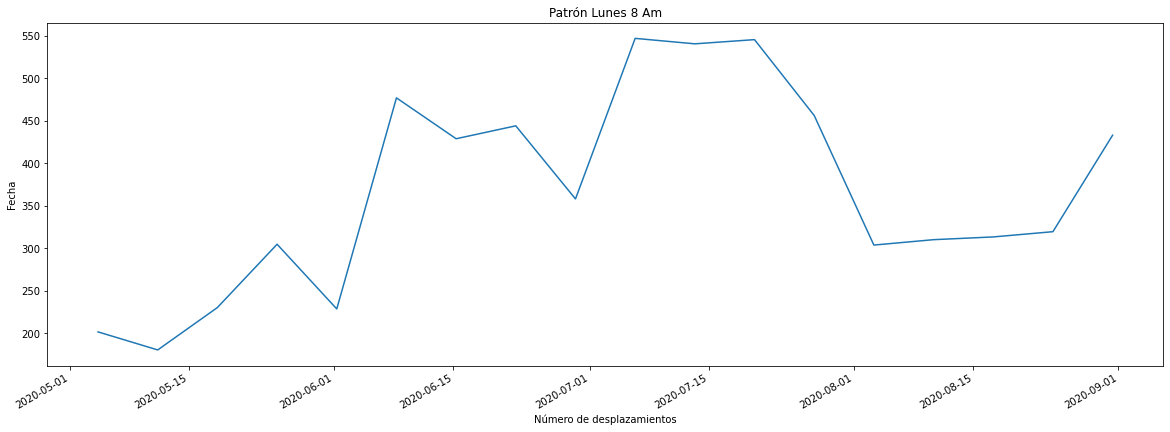

In [15]:
Lunes8AM = Train.loc[Train.loc[:,'Lunes8AM'] == True]
Lunes8AM.set_index('ds',inplace=True)
Lunes8AM[Lunes8AM.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 8 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

In [22]:
predictions = list()

# Se crea una función de predicción continua
def rolling_forecast():       
    history = Train.copy()   # El problema es en history    
    
    for t in range(len(test_X)):        
        m = Prophet(weekly_seasonality=False,daily_seasonality=False)
        m.add_seasonality(name='Lunes1AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes1AM')
        m.add_seasonality(name='Lunes2AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes2AM')
        m.add_seasonality(name='Lunes3AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes3AM')
        m.add_seasonality(name='Lunes4AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes4AM')
        m.add_seasonality(name='Lunes5AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes5AM')
        m.add_seasonality(name='Lunes6AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes6AM')
        m.add_seasonality(name='Lunes7AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes9AM')
        m.add_seasonality(name='Lunes10AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes10AM')
        m.add_seasonality(name='Lunes11AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes11AM')
        m.add_seasonality(name='Lunes12PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes12PM')
        m.add_seasonality(name='Lunes13PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes14PM')        
        m.add_seasonality(name='Lunes15PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes16PM')
        m.add_seasonality(name='Lunes17PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes17PM')
        m.add_seasonality(name='Lunes18PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes18PM')
        m.add_seasonality(name='Lunes19PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes19PM')
        m.add_seasonality(name='Lunes20PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes20PM')
        m.add_seasonality(name='Lunes21PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes21PM')
        m.add_seasonality(name='Lunes22PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes22PM')
        m.add_seasonality(name='Lunes23PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes23PM')
        m.add_seasonality(name='Lunes24AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes24AM')
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')           
        
        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
        future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
        future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
        future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
        future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
        future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
        future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
        future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
        future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
        future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
        future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
        future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
        future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
        future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]        
        print(output)
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]         
        print(yhat)
        predictions.append(yhat)
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [Test[['ds']].iloc[t]], 'y': [Test[['y']].iloc[t]]}
        obs = pd.DataFrame(Test[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig
        

fig = rolling_forecast()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.4788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       521.607   1.40183e-07       98.7849      0.4709      0.4709      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       521.607   2.40103e-08       94.3091      0.3499           1      140   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     ds        yhat  yhat_lower  yhat_upper
0   2020-05-04 00:00:00  109.869231  -95.221042  319.292899
1   2020-05-04 01:00:00  118.462374  -95.311167  330.262417
2   2020-05-04 02:00:00  124.768365 -103.211031  331.609618
3   2020-05-04 03:00:00  126.675606  -93.978163  350.707090
4   2020-05-04 04:00:00  117.106263  -97.669448  342.953832
..                  ...         ...         ...         ...
428 2020-08-31 20:00:00  279.360194   57.481218  487.786967
429 2020-08-31 21:00:00  283.886916   65.736583  506.735433
430 2020-08-31 22:00:00  278.014567   69.815122  505.479512
431 2020-08-31 23:00:00  282.721548   60.765204  486.200008
432 2020-09-01 00:00:00  282.525487   52.496134  498.806949

[433 rows x 4 columns]
282.5254873852183
predicted=282.525487, expected=44.768000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.4788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       523.374   3.73321e-07       95.0452           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       523.413   1.22468e-07       99.9707   1.237e-09       0.001      246  LS failed, Hessian reset 
     163       523.413   9.00889e-09       86.9481       0.383       0.383      251   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


                     ds        yhat  yhat_lower  yhat_upper
0   2020-05-04 00:00:00   88.499466 -136.380744  305.548636
1   2020-05-04 01:00:00  115.598819 -103.503764  335.423925
2   2020-05-04 02:00:00  121.970698  -91.005924  342.767741
3   2020-05-04 03:00:00  123.853024  -99.251104  337.776454
4   2020-05-04 04:00:00  114.106661  -88.270294  321.770124
..                  ...         ...         ...         ...
428 2020-08-31 20:00:00  278.807918   62.654925  495.617481
429 2020-08-31 21:00:00  283.643671   71.749909  497.331022
430 2020-08-31 22:00:00  277.639204   53.373582  493.715191
431 2020-08-31 23:00:00  282.447205   66.538445  488.414317
432 2020-09-01 00:00:00  264.000550   39.194904  478.928790

[433 rows x 4 columns]


IndexError: index 0 is out of bounds for axis 0 with size 0

# Calculamos RMSE
### RMSE de 91.19 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier5 - primer valor -30
### RMSE de 90.60 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier6 - primer valor -31
### RMSE de 89.79 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier6 - primer valor -32.6 - weekly_seasonality False
### RMSE de 121.10 - LunesTodos - fourier6 - primer valor 45 - weekly_seasonality False
### RMSE de 251.85 - LunesTodos - fourier6 - primer valor 375 - weekly_seasonality False - daily_seasonality False
### RMSE de 194.59 - LunesMitad - fourier6 - weekly_seasonality False - daily_seasonality False

In [ ]:
error_PROPHET = mean_squared_error(test_X, predictions) **0.5
print('Test RMSE: %.3f' % error_PROPHET)

# Comparamos la curva de prueba y la curva predicha

In [ ]:
X = Lunes['y'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

RollBack=pd.concat([pd.DataFrame({'TEST':test}),pd.DataFrame({'Prophet':predictions})],axis=1)
RollBack.head()

In [ ]:
RollBack[['TEST', 'Prophet']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [ ]:
fig